<a href="https://colab.research.google.com/github/Lorenzdm93/Udacity-Data-Product-Manager/blob/main/FlyberTestUdacity_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
from google.colab import files

# Prompt to upload the file
uploaded = files.upload()

Saving section-3-event-logs-template.xlsx to section-3-event-logs-template.xlsx


In [5]:
import os

# List files in the current working directory
print(os.listdir())

['.config', 'section-3-event-logs-template.xlsx', 'sample_data']


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
df.head()

In [ ]:
df = df.rename(columns={df.columns[0]: 'row_id'})
df.head()

In [9]:
df1 = df.copy()

In [10]:
def perform_quality_checks(df1):
    # Check for missing values
    missing_values = df1.isnull().sum()
    # Check data types
    data_types = df1.dtypes
    # Check for duplicate rows
    duplicate_rows = df1[df1.duplicated()]
    # Summary of quality checks
    summary = {
        'Missing Values': missing_values,
        'Data Types': data_types,
        'Duplicate Rows': duplicate_rows
      }
    return summary

# Perform quality checks
quality_check_results = perform_quality_checks(df1)

# Display the results
for check, result in quality_check_results.items():
    print(f"\n{check}:\n{result}")


Missing Values:
row_id               0
event_uuid           0
user_uuid            0
event_time           0
device_type          0
session_uuid         0
user_neighborhood    0
event_page           0
event_type           0
dtype: int64

Data Types:
row_id                        int64
event_uuid                   object
user_uuid                    object
event_time           datetime64[ns]
device_type                  object
session_uuid                 object
user_neighborhood            object
event_page                   object
event_type                   object
dtype: object

Duplicate Rows:
Empty DataFrame
Columns: [row_id, event_uuid, user_uuid, event_time, device_type, session_uuid, user_neighborhood, event_page, event_type]
Index: []


In [ ]:
df1.describe()

In [17]:
# Create Day col to aggregate onto
df1['day'] = df1['event_time'].dt.strftime('%d-%m-%Y')

# Group by 'Date' and count the number of events for each date
event_count_per_day = df1.groupby('day')['row_id'].count().reset_index()

# Display the result
print(event_count_per_day)

          day  row_id
0  05-10-2019    9891
1  06-10-2019   18056
2  07-10-2019   18202
3  08-10-2019   17963
4  09-10-2019   17600
5  10-10-2019   17694
6  11-10-2019   17595
7  12-10-2019    7979


In [19]:
# Group by 'day' and 'event_type' and count the number of events
event_count_per_day_type = df1.groupby(['day', 'event_type']).size().reset_index(name='event_count')

# Pivot the result to have 'event_type' in the first column and each day in a separate column
pivot_result = event_count_per_day_type.pivot(index='event_type', columns='day', values='event_count').fillna(0)

# Display the result
print(pivot_result)

day          05-10-2019  06-10-2019  07-10-2019  08-10-2019  09-10-2019  \
event_type                                                                
begin_ride           38          49          62          86          57   
choose_car         1498        2843        2953        2769        2725   
open               6594       11733       11767       11662       11531   
request_car         277         540         596         547         538   
search             1484        2891        2824        2899        2749   

day          10-10-2019  11-10-2019  12-10-2019  
event_type                                       
begin_ride           57          78          18  
choose_car         2801        2804        1301  
open              11325       11371        5133  
request_car         607         521         220  
search             2904        2821        1307  


In [21]:
event_count_per_day_device = df1.groupby(['day', 'device_type']).size().reset_index(name='event_count')
pivot_result_device = event_count_per_day_device.pivot(
        index='device_type', columns='day', values='event_count'
        ).fillna(0)
print(pivot_result_device)

day          05-10-2019  06-10-2019  07-10-2019  08-10-2019  09-10-2019  \
device_type                                                               
android            1463        2870        2854        2729        2744   
desktop_web         895        2007        1600        1958        1712   
ios                2384        4337        4217        4373        4380   
mobile_web         5149        8842        9531        8903        8764   

day          10-10-2019  11-10-2019  12-10-2019  
device_type                                      
android            2562        2672        1231  
desktop_web        1866        1777         682  
ios                4482        4500        2026  
mobile_web         8784        8646        4040  


In [25]:
event_count_per_day_neigh = df1.groupby(['day', 'user_neighborhood']).size().reset_index(name='neigh_day_count')
pivot_result_neigh = event_count_per_day_neigh.pivot(
      index='user_neighborhood', columns='day', values='neigh_day_count'
      ).fillna(0)
print(pivot_result_neigh)

day                05-10-2019  06-10-2019  07-10-2019  08-10-2019  09-10-2019  \
user_neighborhood                                                               
Bronx                     250         533         507         469         510   
Brooklyn                 2009        3737        3590        4025        3440   
Manhattan                6869       12591       12807       12180       12270   
Queens                    595         842         905         893        1026   
Staten Island             168         353         393         396         354   

day                10-10-2019  11-10-2019  12-10-2019  
user_neighborhood                                      
Bronx                     394         558         231  
Brooklyn                 3400        3556        1594  
Manhattan               12371       12201        5580  
Queens                   1069         936         386  
Staten Island             460         344         188  


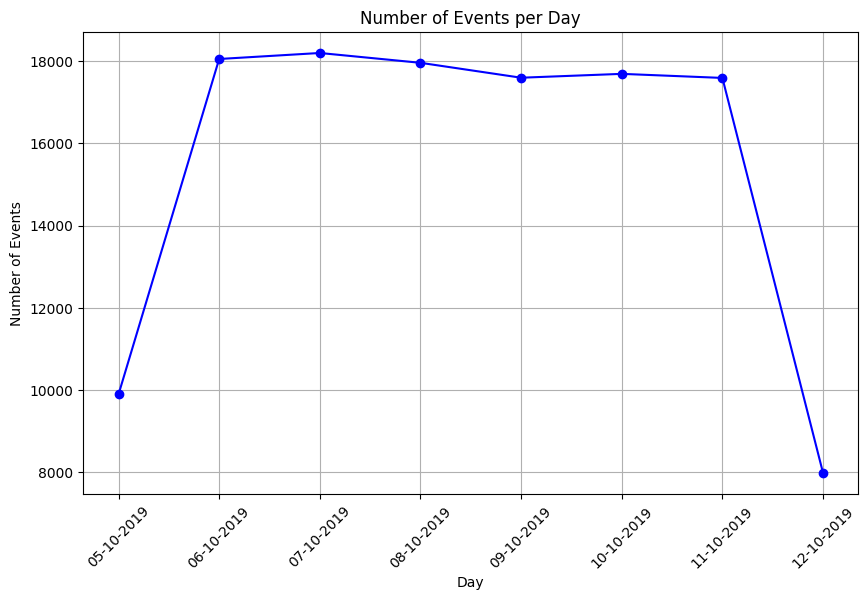

In [27]:
import matplotlib.pyplot as plt

events_per_day = df1.groupby('day')['row_id'].count().reset_index(name='events_count')

plt.figure(figsize=(10, 6))
plt.plot(events_per_day['day'], events_per_day['events_count'], marker='o', linestyle='-', color='b')
plt.title('Number of Events per Day')
plt.xlabel('Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

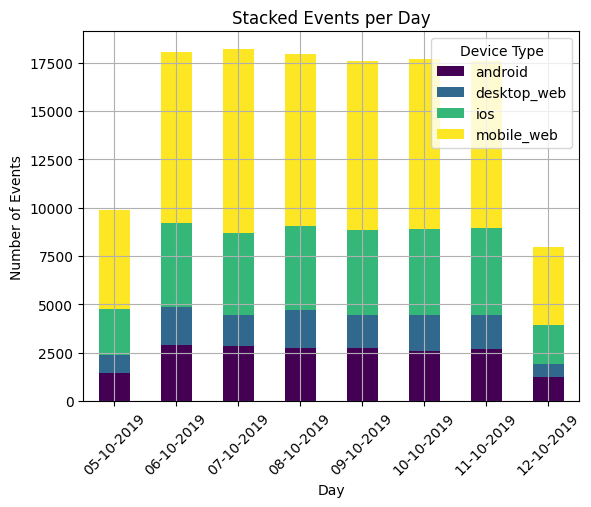

In [28]:
events_by_type_per_day = df1.groupby(['day', 'device_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
events_by_type_per_day.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stacked Events per Day')
plt.xlabel('Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Device Type')
plt.grid(True)
plt.show()

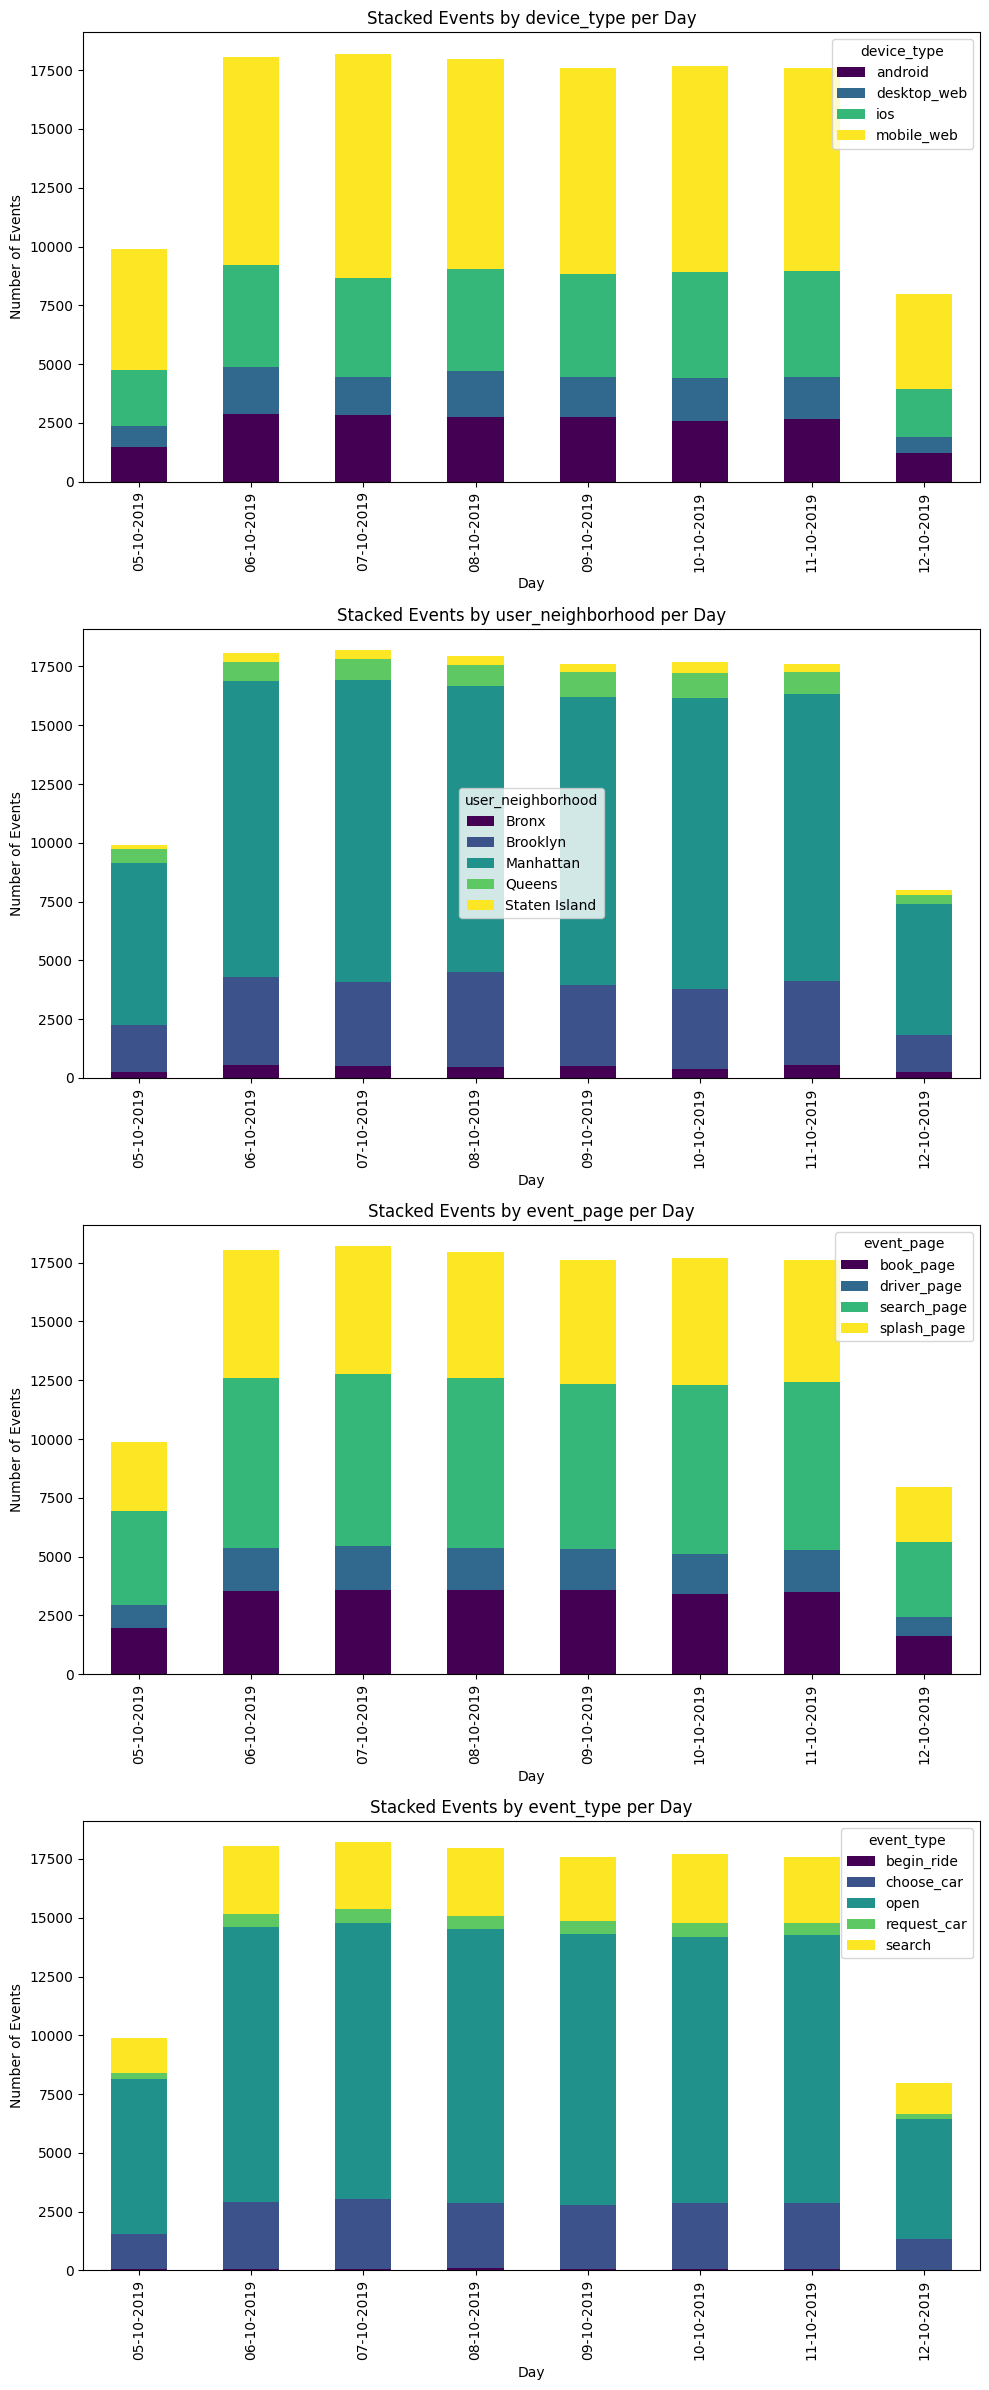

In [31]:
import seaborn as sns

columns_to_visualize = ['device_type', 'user_neighborhood', 'event_page','event_type']

# Create a grid of subplots
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(10, 6 * len(columns_to_visualize)))

# Iterate through columns and plot stacked bar chart for each
for i, col in enumerate(columns_to_visualize):
    # Group by 'day' and the current column to count the number of events per day for each category
    events_by_category_per_day = df1.groupby(['day', col]).size().unstack(fill_value=0)

    # Plotting a stacked bar chart on the current subplot
    events_by_category_per_day.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'Stacked Events by {col} per Day')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Number of Events')
    axes[i].legend(title=col)

# Adjust layout
plt.tight_layout()
plt.show()

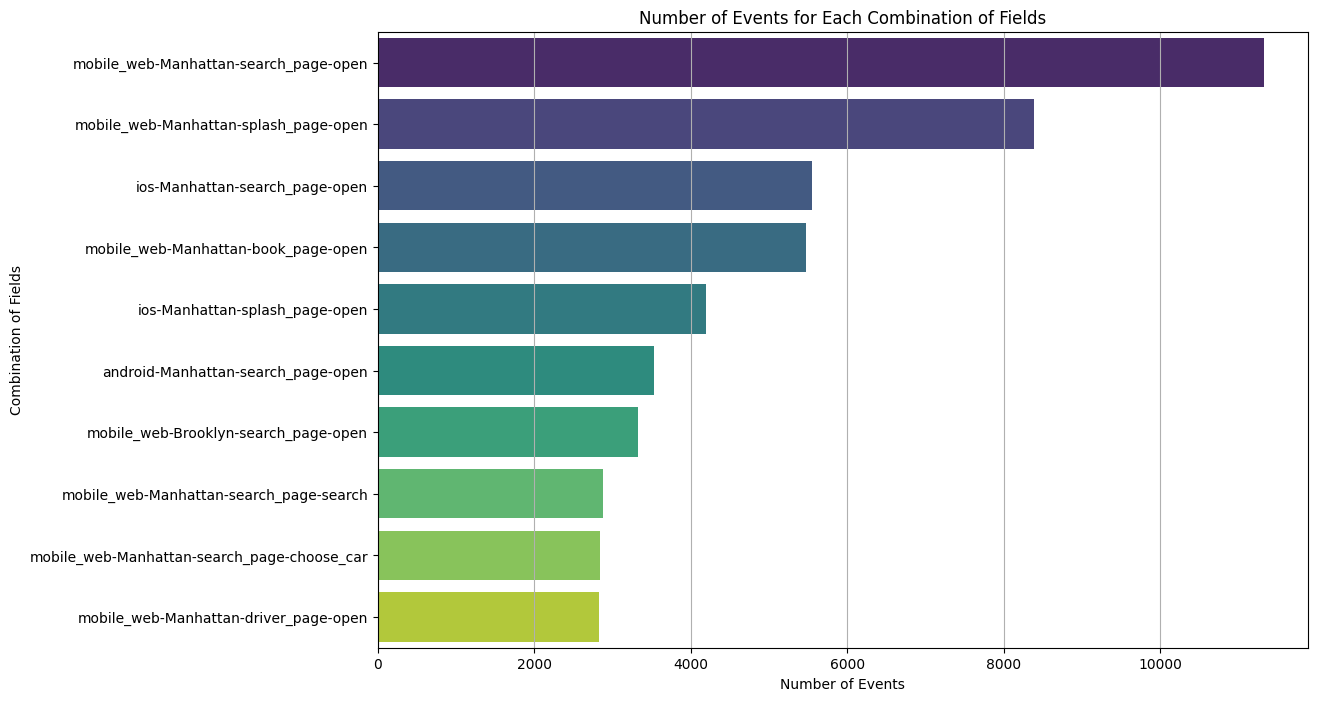

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['device_type', 'user_neighborhood', 'event_page','event_type']

# Check if all specified columns exist in the DataFrame
for col in columns_to_visualize:
    if col not in df1.columns:
        raise KeyError(f"'{col}' column not found in the DataFrame.")

# Group by the specified columns to count the number of events for each combination
events_by_combination = df1.groupby(columns_to_visualize).size().reset_index(name='events_count')
top_10_combinations = events_by_combination.nlargest(10, 'events_count')

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='events_count', y=top_10_combinations[columns_to_visualize].astype(str).agg('-'.join, axis=1),
            data=top_10_combinations, palette='viridis')
plt.title('Number of Events for Each Combination of Fields')
plt.xlabel('Number of Events')
plt.ylabel('Combination of Fields')
plt.grid(axis='x')
plt.show()
